# **Tehetségkutató adatbázis**

# <span style="color:rgb(5, 5, 5);font-family:&quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif;font-size:15px;">A csapatunk </span> <span style="color:rgb(5, 5, 5);font-family:&quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif;font-size:15px;">az első feladatot választotta a beadandó elkészítéséhez. Egy képzeletbeli tehetségkutatónak készítettük el az adatbázisát.<br></span><span style="color:rgb(5, 5, 5);font-family:&quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif;font-size:15px;">Csapatunk: </span> <span style="color:rgb(5, 5, 5);font-family:&quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif;font-size:15px;">Deskó Zoltán (G04 csoport), Malomka Gabriella (G03 csoport), Muntean Áron (G03 csoport)<br></span>

<span style="color:rgb(5, 5, 5);font-family:&quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif;font-size:15px;">Használt szofverek:</span>

- Oracle datamodeler
- JupyterNotebook
- SQL Online Compiler

# <u>Logikai modell</u>

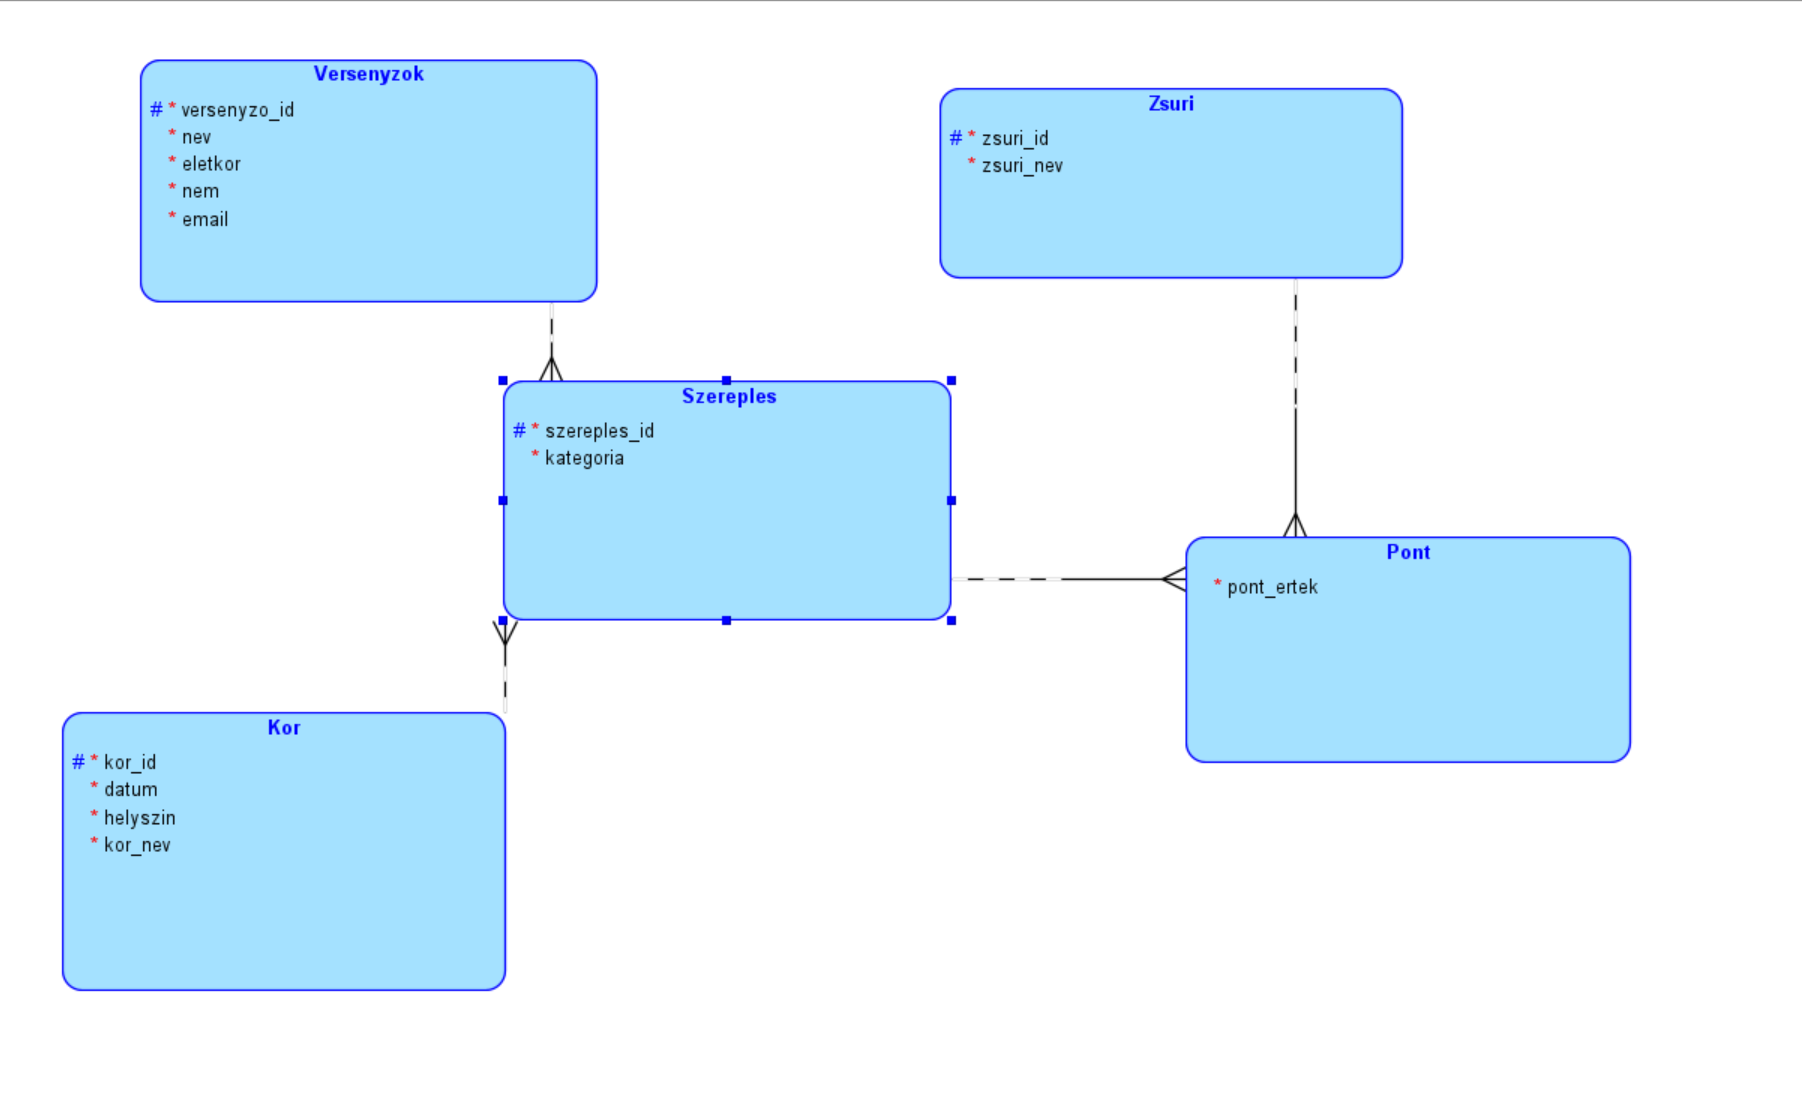

In [5]:
from IPython.display import Image
Image(filename='logikai_modell.png')

# <span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">Ahogy az a logikai modellünkön is látható, van egy táblánk, ahol a versenyzők adatait tároltuk el ("Versenyzok" tábla), valamint mindegyikükhöz egy azonosítót rendeltünk. Emellett a zsűriket is hasonló módon rögzítettük ("Zsuri" tábla) (csak 4 személy került ebbe a táblába). A "Kor" táblába egy-egy adott forduló adatait tároltuk el, így megkülönböztettünk 5 (az elsőt kört két felé bontottuk időben a sok szereplő miatt, tehát az első forduló két különböző időpontba lett megrendezve) fordulót. A "Szereplés" táblába pedig egy-egy színpadra lépésnek az adatai kerültek. Itt szerepel az adott fordulóban (Kor tábla), adott versenyző (Versenyzok tábla) szereplésének az azonosítója, amihez a "Pont" táblában értékelést is rendeltünk. Ebben a táblában minden szerepléshez 4 darab pont tartozik, mivel minden zsűri egyénileg pontozta a résztvevőket. Ezek a pontok alapján jutottak tovább a versenyzők a következő fordulóba (vagy éppen estek ki a versenyből).<br></span>

# <span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">Az ábrán látható logikai modellünkben még nem jelennek meg az idegen kulcsok (Oracle datamodeller által kínált módszertannal hoztuk létre a fizikai modellünket, ahol a kapcsolatok a logikai modellben csak táblák közötti egyenesekkel vannak jelen, tehát nem tartalmaznak idegen kulcsokat) ezek csak később a fizikai modell generálásakor kerültek be a modellbe.</span>

# <u>Fizikai modell</u>

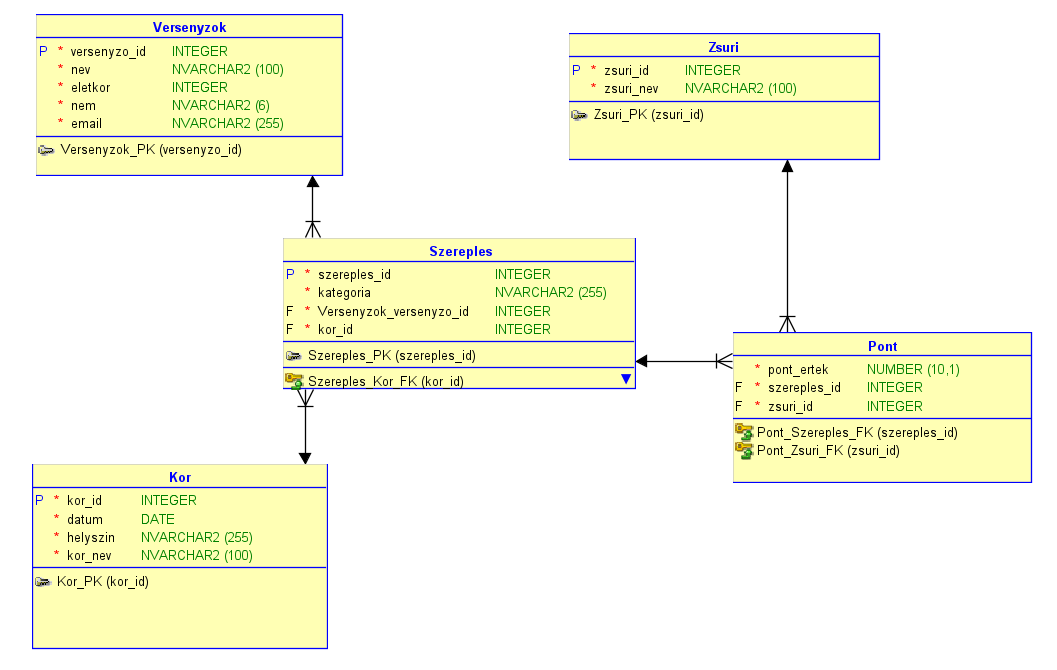

In [2]:
from IPython.display import Image
Image(filename='fizikai_modell.png')

# <span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">A fizikai modellünkben már megjelentek a fent leírtak alapján az idegen kulcsok, valamint az egyes oszlopok adattípusai is. Az adatok a Chat-GPT által lettek generálva és egyes esetekben manuálisan módosítva Excel program segítségével. Ebből az adatállományból épül fel az adatbázis harmadik normálformában. A táblák generáláshoz szükséges SQL kódokat az mssql mappában az MS_SQL_Tablak_letrehozasa.sql file tartalmazza, a fenti képeket pedig a logikai_modell.png és fizikai_modell.png fájlok tartalmazzák. Az oracle modeller segítségével megalkotott logiaki és fizikai modell fájlait az oracle_modeler_files mappa tartalmazza.</span>

# <u>Táblák létrehozása</u>

In [ ]:
CREATE TABLE Versenyzok
(
   versenyzo_id   int NOT NULL,
   nev            varchar(100) NOT NULL,
   eletkor             int NOT NULL,
   nem          varchar(6) NOT NULL,
   email    varchar(255) NULL,
   CONSTRAINT ck_eletkor CHECK (eletkor >= 18),
   CONSTRAINT ck_email CHECK (email LIKE '%@%.%'),
   CONSTRAINT pk_versenyzok PRIMARY KEY (versenyzo_id)
);

CREATE TABLE Kor
(
   kor_id      int NOT NULL,
   kor_nev    varchar(100) NOT NULL,
   datum          date NOT NULL,
   helyszin      varchar(255) NULL,
   CONSTRAINT pk_kor PRIMARY KEY (kor_id)
);

CREATE TABLE Szereples
(
   szereples_id       int NOT NULL,
   versenyzo_id        int NOT NULL,
   kor_id             int NOT NULL,
   kategoria varchar(255) NULL,
   CONSTRAINT pk_szereples PRIMARY KEY (szereples_id),
   CONSTRAINT fk_szereples_versenyzo FOREIGN KEY (versenyzo_id) REFERENCES Versenyzok(versenyzo_id),
   CONSTRAINT fk_szereples_kor FOREIGN KEY (kor_id) REFERENCES Kor(kor_id)
);

CREATE TABLE Zsuri
(
   zsuri_id        int NOT NULL,
   zsuri_nev            varchar(100) NOT NULL,
   CONSTRAINT pk_zsuri PRIMARY KEY (zsuri_id)
);

CREATE TABLE Pont
(
   szereples_id         int NOT NULL,
   zsuri_id         int NOT NULL,
   pont_ertek      decimal(10, 1) NOT NULL,
   CONSTRAINT pk_pont_szereples PRIMARY KEY (szereples_id, zsuri_id),
   CONSTRAINT fk_szereples FOREIGN KEY (szereples_id) REFERENCES Szereples(szereples_id),
   CONSTRAINT fk_zsuri FOREIGN KEY (zsuri_id) REFERENCES Zsuri(zsuri_id),
   CONSTRAINT ck_pont_ertek CHECK (pont_ertek >= 1 AND pont_ertek <= 10)
);

# <u>Adatok beszúrása</u>

## Versenyzők tábla

A tábla tartalmaz egy <span style="color: var(--vscode-foreground);">"</span><span style="color: var(--vscode-foreground);">versenyzo_id</span><span style="color: var(--vscode-foreground);">"</span>    <span style="color: var(--vscode-foreground);">&nbsp;elsődleges kulcs oszlopot amely integer típusú, egy "</span><span style="color: var(--vscode-foreground);">nev</span><span style="color: var(--vscode-foreground);">" oszlopot amely nvarchar(50) típusú, egy "</span><span style="color: var(--vscode-foreground);">eletkor</span> <span style="color: var(--vscode-foreground);">" oszlopot amely ingeter típusú tizennyolccal egyenlő vagy a feletti megszorítással, egy "nem" oszlopot amely nvarchar(6) típusú és egy "email" oszlopot amely nvarchar(50) típusú LIKE "%@%.%" megszorítással. Ez a tábla egy a többhöz kapcsolatban áll a Szereplés táblával.</span>

In [ ]:
insert Versenyzok 
(
  versenyzo_id,nev,eletkor,nem,email
)

SELECT 1, 'John Doe', 25, 'férfi', 'john@example.com'
UNION ALL
SELECT 2, 'Jane Smith', 30, 'nő', 'jane@example.com'
UNION ALL
SELECT 3, 'Alice Johnson', 22, 'nő', 'alice@example.com'
UNION ALL
SELECT 4, 'Bob Brown', 28, 'férfi', 'bob@example.com'
UNION ALL
SELECT 5, 'Michael Davis', 35, 'férfi', 'michael@example.com'
UNION ALL
SELECT 6, 'Emily Wilson', 27, 'nő', 'emily@example.com'
UNION ALL
SELECT 7, 'William Taylor', 33, 'férfi', 'william@example.com'
UNION ALL
SELECT 8, 'Sarah Martinez', 29, 'nő', 'sarah@example.com'
UNION ALL
SELECT 9, 'James Anderson', 26, 'férfi', 'james@example.com'
UNION ALL
SELECT 10, 'Jennifer White', 31, 'nő', 'jennifer@example.com'
UNION ALL
SELECT 11, 'David Thompson', 24, 'férfi', 'david@example.com'
UNION ALL
SELECT 12, 'Jessica Garcia', 23, 'nő', 'jessica@example.com'
UNION ALL
SELECT 13, 'Christopher Hernandez', 32, 'férfi', 'christopher@example.com'
UNION ALL
SELECT 14, 'Amanda Martinez', 28, 'nő', 'amanda@example.com'
UNION ALL
SELECT 15, 'Matthew Brown', 29, 'férfi', 'matthew@example.com'
UNION ALL
SELECT 16, 'Lauren Miller', 26, 'nő', 'lauren@example.com'
UNION ALL
SELECT 17, 'Daniel Wilson', 27, 'férfi', 'daniel@example.com'
UNION ALL
SELECT 18, 'Ashley Garcia', 25, 'nő', 'ashley@example.com'
UNION ALL
SELECT 19, 'Andrew Johnson', 30, 'férfi', 'andrew@example.com'
UNION ALL
SELECT 20, 'Megan Taylor', 29, 'nő', 'megan@example.com'
UNION ALL
SELECT 21, 'Justin Martinez', 28, 'férfi', 'justin@example.com'
UNION ALL
SELECT 22, 'Stephanie Brown', 27, 'nő', 'stephanie@example.com'
UNION ALL
SELECT 23, 'Brandon Miller', 26, 'férfi', 'brandon@example.com'
UNION ALL
SELECT 24, 'Heather Wilson', 25, 'nő', 'heather@example.com'
UNION ALL
SELECT 25, 'Nicole Garcia', 31, 'férfi', 'nicole@example.com'
UNION ALL
SELECT 26, 'Joshua Anderson', 24, 'nő', 'joshua@example.com'
UNION ALL
SELECT 27, 'Samantha Taylor', 23, 'férfi', 'samantha@example.com'
UNION ALL
SELECT 28, 'Robert Johnson', 32, 'nő', 'robert@example.com'
UNION ALL
SELECT 29, 'Elizabeth Martinez', 28, 'férfi', 'elizabeth@example.com'
UNION ALL
SELECT 30, 'Ryan Brown', 27, 'nő', 'ryan@example.com'
UNION ALL
SELECT 31, 'Kayla Miller', 26, 'férfi', 'kayla@example.com'
UNION ALL
SELECT 32, 'Kevin Wilson', 25, 'nő', 'kevin@example.com'
UNION ALL
SELECT 33, 'Taylor Garcia', 30, 'férfi', 'taylor@example.com'
UNION ALL
SELECT 34, 'Emily Anderson', 29, 'nő', 'emily2@example.com'
UNION ALL
SELECT 35, 'Jacob Taylor', 28, 'férfi', 'jacob@example.com'
UNION ALL
SELECT 36, 'Olivia Johnson', 27, 'nő', 'olivia@example.com'
UNION ALL
SELECT 37, 'Michael Martinez', 26, 'férfi', 'michael2@example.com'
UNION ALL
SELECT 38, 'Grace Brown', 25, 'nő', 'grace@example.com'
UNION ALL
SELECT 39, 'Tyler Miller', 31, 'férfi', 'tyler@example.com'
UNION ALL
SELECT 40, 'Hannah Wilson', 24, 'nő', 'hannah@example.com'
UNION ALL
SELECT 41, 'Brandon Garcia', 23, 'férfi', 'brandon2@example.com'
UNION ALL
SELECT 42, 'Madison Johnson', 32, 'nő', 'madison@example.com'
UNION ALL
SELECT 43, 'Zachary Martinez', 28, 'férfi', 'zachary@example.com'
UNION ALL
SELECT 44, 'Alexis Brown', 27, 'nő', 'alexis@example.com'
UNION ALL
SELECT 45, 'Brittany Taylor', 26, 'férfi', 'brittany@example.com'
UNION ALL
SELECT 46, 'Cody Wilson', 25, 'nő', 'cody@example.com'
UNION ALL
SELECT 47, 'Samantha Garcia', 30, 'férfi', 'samantha2@example.com'
UNION ALL
SELECT 48, 'Austin Miller', 29, 'nő', 'austin@example.com'
UNION ALL
SELECT 49, 'Maria Johnson', 28, 'férfi', 'maria@example.com'
UNION ALL
SELECT 50, 'Erica Martinez', 27, 'nő', 'erica@example.com'
UNION ALL
SELECT 51, 'Nathan Brown', 26, 'férfi', 'nathan@example.com'
UNION ALL
SELECT 52, 'Rachel Wilson', 31, 'nő', 'rachel@example.com'
UNION ALL
SELECT 53, 'Benjamin Garcia', 24, 'férfi', 'benjamin@example.com'
UNION ALL
SELECT 54, 'Katherine Taylor', 23, 'nő', 'katherine@example.com'
UNION ALL
SELECT 55, 'Patrick Miller', 32, 'férfi', 'patrick@example.com'
UNION ALL
SELECT 56, 'Christina Johnson', 28, 'nő', 'christina@example.com'
UNION ALL
SELECT 57, 'Jonathan Martinez', 27, 'férfi', 'jonathan@example.com'
UNION ALL
SELECT 58, 'Lindsay Brown', 26, 'nő', 'lindsay@example.com'
UNION ALL
SELECT 59, 'Alexander Wilson', 25, 'férfi', 'alexander@example.com'
UNION ALL
SELECT 60, 'Vanessa Garcia', 30, 'nő', 'vanessa@example.com'
UNION ALL
SELECT 61, 'Stephen Miller', 29, 'férfi', 'stephen@example.com'
UNION ALL
SELECT 62, 'Courtney Johnson', 28, 'nő', 'courtney@example.com'
UNION ALL
SELECT 63, 'Dylan Taylor', 27, 'férfi', 'dylan@example.com'
UNION ALL
SELECT 64, 'Brianna Brown', 26, 'nő', 'brianna@example.com'
UNION ALL
SELECT 65, 'Jeremy Wilson', 31, 'férfi', 'jeremy@example.com'
UNION ALL
SELECT 66, 'Allison Garcia', 24, 'nő', 'allison@example.com'
UNION ALL
SELECT 67, 'Ethan Martinez', 23, 'férfi', 'ethan@example.com'
UNION ALL
SELECT 68, 'Tiffany Johnson', 32, 'nő', 'tiffany@example.com'
UNION ALL
SELECT 69, 'Victoria Brown', 28, 'férfi', 'victoria@example.com'
UNION ALL
SELECT 70, 'Shawn Wilson', 27, 'nő', 'shawn@example.com'
UNION ALL
SELECT 71, 'Monica Garcia', 26, 'férfi', 'monica@example.com'
UNION ALL
SELECT 72, 'Peter Taylor', 25, 'nő', 'peter@example.com'
UNION ALL
SELECT 73, 'Cassandra Miller', 30, 'férfi', 'cassandra@example.com'
UNION ALL
SELECT 74, 'Jeffrey Johnson', 29, 'nő', 'jeffrey@example.com'
UNION ALL
SELECT 75, 'Kelly Brown', 28, 'férfi', 'kelly@example.com'
UNION ALL
SELECT 76, 'Derek Wilson', 27, 'nő', 'derek@example.com'
UNION ALL
SELECT 77, 'Morgan Garcia', 26, 'férfi', 'morgan@example.com'
UNION ALL
SELECT 78, 'Christine Martinez', 31, 'nő', 'christine@example.com'
UNION ALL
SELECT 79, 'Gregory Johnson', 24, 'férfi', 'gregory@example.com'
UNION ALL
SELECT 80, 'Alyssa Brown', 23, 'nő', 'alyssa@example.com'
UNION ALL
SELECT 81, 'Patrick Wilson', 32, 'férfi', 'patrick2@example.com'
UNION ALL
SELECT 82, 'Melissa Garcia', 28, 'nő', 'melissa@example.com'
UNION ALL
SELECT 83, 'Tyler Miller', 27, 'férfi', 'tyler2@example.com'
UNION ALL
SELECT 84, 'Victoria Johnson', 26, 'nő', 'victoria2@example.com'
UNION ALL
SELECT 85, 'Daniel Brown', 25, 'férfi', 'daniel2@example.com'
UNION ALL
SELECT 86, 'Jessica Wilson', 30, 'nő', 'jessica2@example.com'
UNION ALL
SELECT 87, 'Joshua Garcia', 29, 'férfi', 'joshua2@example.com'
UNION ALL
SELECT 88, 'Lauren Taylor', 28, 'nő', 'lauren2@example.com'
UNION ALL
SELECT 89, 'Christopher Martinez', 27, 'férfi', 'christopher2@example.com'
UNION ALL
SELECT 90, 'Ashley Johnson', 26, 'nő', 'ashley2@example.com'
UNION ALL
SELECT 91, 'Andrew Brown', 31, 'férfi', 'andrew2@example.com'
UNION ALL
SELECT 92, 'Sarah Wilson', 24, 'nő', 'sarah2@example.com'
UNION ALL
SELECT 93, 'Ryan Garcia', 23, 'férfi', 'ryan2@example.com'
UNION ALL
SELECT 94, 'Emily Johnson', 32, 'nő', 'emily3@example.com'
UNION ALL
SELECT 95, 'Matthew Brown', 28, 'férfi', 'matthew2@example.com'
UNION ALL
SELECT 96, 'Rebecca Wilson', 27, 'nő', 'rebecca@example.com'
UNION ALL
SELECT 97, 'Jennifer Garcia', 26, 'férfi', 'jennifer2@example.com'
UNION ALL
SELECT 98, 'Michael Johnson', 25, 'nő', 'michael3@example.com'
UNION ALL
SELECT 99, 'Hannah Brown', 30, 'férfi', 'hannah2@example.com'
UNION ALL
SELECT 100, 'Nicholas Wilson', 29, 'nő', 'nicholas@example.com';

## Kor tábla

A tábla tartalmaz egy <span style="color: var(--vscode-foreground);">"kor</span><span style="color: var(--vscode-foreground);">_id</span><span style="color: var(--vscode-foreground);">"</span>   <span style="color: var(--vscode-foreground);">&nbsp;elsődleges kulcs oszlopot amely integer típusú, egy "datum</span><span style="color: var(--vscode-foreground);">" oszlopot amely date típusú, egy "helyszin</span> <span style="color: var(--vscode-foreground);">" oszlopot amely nvarchar(200) típusú, és egy "kor_nev" oszlopot amely nvarchar(20) típusú. Ez a tábla egy a többhöz kapcsolatban áll a Szereplés táblával.</span>

In [ ]:
insert Kor 
(
  kor_id, kor_nev, datum, helyszin
)

SELECT 1, 'Első forduló (1. csoport)', '2024-05-01', 'Budapest'
UNION ALL
SELECT 2, 'Első forduló (2. csoport)', '2024-05-02', 'Budapest'
UNION ALL
SELECT 3, 'Második forduló', '2024-05-07', 'Debrecen'
UNION ALL
SELECT 4, 'Harmadik forduló', '2024-05-14', 'Szeged'
UNION ALL
SELECT 5, 'Elődöntő', '2024-05-20', 'Pécs'
UNION ALL
SELECT 6, 'Döntő', '2024-05-29', 'Győr';

## Szereplés tábla

A tábla tartalmaz egy <span style="color: var(--vscode-foreground);">"szereples</span><span style="color: var(--vscode-foreground);">_id</span><span style="color: var(--vscode-foreground);">"</span>  <span style="color: var(--vscode-foreground);">&nbsp;elsődleges kulcs oszlopot amely integer típusú, egy "kategoria</span><span style="color: var(--vscode-foreground);">" oszlopot amely nvarchar(200) típusú, egy "versenyzo_id</span> <span style="color: var(--vscode-foreground);">" oszlopot amely integer típusú idegen kulcs, és egy "kor_id" oszlopot amely integer típusú szintén idegen kulcs. A szereplés tábla egy a többhöz kapcsolatban áll a pont táblával és töb az egyhez kapcsolatban áll a kor és a versenyzok táblákkal.</span>

In [ ]:
insert Szereples 
(
  szereples_id, versenyzo_id, kor_id, kategoria
)

SELECT 1,1,1,'Tánc'
UNION ALL
SELECT 2,2,1, 'Ének'
UNION ALL
SELECT 3,3,1,'Vicc mesélés'
UNION ALL
SELECT 4,4,1,'Pantomim'
UNION ALL
SELECT 5,5,1,'Zsonglőrködés'
UNION ALL
SELECT 6,6,1,'Bűvészkedés'
UNION ALL
SELECT 7,7,1,'Festés'
UNION ALL
SELECT 8,8,1,'Súlyemelés'
UNION ALL
SELECT 9,9,1,'Egyéb'
UNION ALL
SELECT 10,10,1,'Ritmikus gimnasztika'
UNION ALL
SELECT 11,11,1,'Tánc'
UNION ALL
SELECT 12,12,1, 'Ének'
UNION ALL
SELECT 13,13,1,'Vicc mesélés'
UNION ALL
SELECT 14,14,1,'Pantomim'
UNION ALL
SELECT 15,15,1,'Zsonglőrködés'
UNION ALL
SELECT 16,16,1,'Bűvészkedés'
UNION ALL
SELECT 17,17,1,'Festés'
UNION ALL
SELECT 18,18,1,'Súlyemelés'
UNION ALL
SELECT 19,19,1,'Egyéb'
UNION ALL
SELECT 20,20,1,'Ritmikus gimnasztika'
UNION ALL
SELECT 21,21,1,'Tánc'
UNION ALL
SELECT 22,22,1, 'Ének'
UNION ALL
SELECT 23,23,1,'Vicc mesélés'
UNION ALL
SELECT 24,24,1,'Pantomim'
UNION ALL
SELECT 25,25,1,'Zsonglőrködés'
UNION ALL
SELECT 26,26,1,'Bűvészkedés'
UNION ALL
SELECT 27,27,1,'Festés'
UNION ALL
SELECT 28,28,1,'Súlyemelés'
UNION ALL
SELECT 29,29,1,'Egyéb'
UNION ALL
SELECT 30,30,1,'Ritmikus gimnasztika'
UNION ALL
SELECT 31,31,1,'Tánc'
UNION ALL
SELECT 32,32,1, 'Ének'
UNION ALL
SELECT 33,33,1,'Vicc mesélés'
UNION ALL
SELECT 34,34,1,'Pantomim'
UNION ALL
SELECT 35,35,1,'Zsonglőrködés'
UNION ALL
SELECT 36,36,1,'Bűvészkedés'
UNION ALL
SELECT 37,37,1,'Festés'
UNION ALL
SELECT 38,38,1,'Súlyemelés'
UNION ALL
SELECT 39,39,1,'Egyéb'
UNION ALL
SELECT 40,40,1,'Ritmikus gimnasztika'
UNION ALL
SELECT 41,41,1,'Tánc'
UNION ALL
SELECT 42,42,1, 'Ének'
UNION ALL
SELECT 43,43,1,'Vicc mesélés'
UNION ALL
SELECT 44,44,1,'Pantomim'
UNION ALL
SELECT 45,45,1,'Zsonglőrködés'
UNION ALL
SELECT 46,46,1,'Bűvészkedés'
UNION ALL
SELECT 47,47,1,'Festés'
UNION ALL
SELECT 48,48,1,'Súlyemelés'
UNION ALL
SELECT 49,49,1,'Egyéb'
UNION ALL
SELECT 50,50,1,'Ritmikus gimnasztika'
UNION ALL
SELECT 51,51,2,'Tánc'
UNION ALL
SELECT 52,52,2, 'Ének'
UNION ALL
SELECT 53,53,2,'Vicc mesélés'
UNION ALL
SELECT 54,54,2,'Pantomim'
UNION ALL
SELECT 55,55,2,'Zsonglőrködés'
UNION ALL
SELECT 56,56,2,'Bűvészkedés'
UNION ALL
SELECT 57,57,2,'Festés'
UNION ALL
SELECT 58,58,2,'Súlyemelés'
UNION ALL
SELECT 59,59,2,'Egyéb'
UNION ALL
SELECT 60,60,2,'Ritmikus gimnasztika'
UNION ALL
SELECT 61,61,2,'Tánc'
UNION ALL
SELECT 62,62,2, 'Ének'
UNION ALL
SELECT 63,63,2,'Vicc mesélés'
UNION ALL
SELECT 64,64,2,'Pantomim'
UNION ALL
SELECT 65,65,2,'Zsonglőrködés'
UNION ALL
SELECT 66,66,2,'Bűvészkedés'
UNION ALL
SELECT 67,67,2,'Festés'
UNION ALL
SELECT 68,68,2,'Súlyemelés'
UNION ALL
SELECT 69,69,2,'Egyéb'
UNION ALL
SELECT 70,70,2,'Ritmikus gimnasztika'
UNION ALL
SELECT 71,71,2,'Tánc'
UNION ALL
SELECT 72,72,2, 'Ének'
UNION ALL
SELECT 73,73,2,'Vicc mesélés'
UNION ALL
SELECT 74,74,2,'Pantomim'
UNION ALL
SELECT 75,75,2,'Zsonglőrködés'
UNION ALL
SELECT 76,76,2,'Bűvészkedés'
UNION ALL
SELECT 77,77,2,'Festés'
UNION ALL
SELECT 78,78,2,'Súlyemelés'
UNION ALL
SELECT 79,79,2,'Egyéb'
UNION ALL
SELECT 80,80,2,'Ritmikus gimnasztika'
UNION ALL
SELECT 81,81,2,'Tánc'
UNION ALL
SELECT 82,82,2, 'Ének'
UNION ALL
SELECT 83,83,2,'Vicc mesélés'
UNION ALL
SELECT 84,84,2,'Pantomim'
UNION ALL
SELECT 85,85,2,'Zsonglőrködés'
UNION ALL
SELECT 86,86,2,'Bűvészkedés'
UNION ALL
SELECT 87,87,2,'Festés'
UNION ALL
SELECT 88,88,2,'Súlyemelés'
UNION ALL
SELECT 89,89,2,'Egyéb'
UNION ALL
SELECT 90,90,2,'Ritmikus gimnasztika'
UNION ALL
SELECT 91,91,2,'Tánc'
UNION ALL
SELECT 92,92,2, 'Ének'
UNION ALL
SELECT 93,93,2,'Vicc mesélés'
UNION ALL
SELECT 94,94,2,'Pantomim'
UNION ALL
SELECT 95,95,2,'Zsonglőrködés'
UNION ALL
SELECT 96,96,2,'Bűvészkedés'
UNION ALL
SELECT 97,97,2,'Festés'
UNION ALL
SELECT 98,98,2,'Súlyemelés'
UNION ALL
SELECT 99,99,2,'Egyéb'
UNION ALL
SELECT 100,100,2,'Ritmikus gimnasztika' 
UNION ALL
SELECT 101,1,3,'Tánc'
UNION ALL
SELECT 102,2,3, 'Ének'
UNION ALL
SELECT 103,3,3,'Vicc mesélés'
UNION ALL
SELECT 104,4,3,'Pantomim'
UNION ALL
SELECT 105,5,3,'Zsonglőrködés'
UNION ALL
SELECT 106,6,3,'Bűvészkedés'
UNION ALL
SELECT 107,7,3,'Festés'
UNION ALL
SELECT 108,8,3,'Súlyemelés'
UNION ALL
SELECT 109,9,3,'Egyéb'
UNION ALL
SELECT 110,10,3,'Ritmikus gimnasztika'
UNION ALL
SELECT 111,11,3,'Tánc'
UNION ALL
SELECT 112,12,3, 'Ének'
UNION ALL
SELECT 113,13,3,'Vicc mesélés'
UNION ALL
SELECT 114,14,3,'Pantomim'
UNION ALL
SELECT 115,15,3,'Zsonglőrködés'
UNION ALL
SELECT 116,16,3,'Bűvészkedés'
UNION ALL
SELECT 117,17,3,'Festés'
UNION ALL
SELECT 118,18,3,'Súlyemelés'
UNION ALL
SELECT 119,19,3,'Egyéb'
UNION ALL
SELECT 120,20,3,'Ritmikus gimnasztika'
UNION ALL
SELECT 121,21,3,'Tánc'
UNION ALL
SELECT 122,22,3, 'Ének'
UNION ALL
SELECT 123,23,3,'Vicc mesélés'
UNION ALL
SELECT 124,24,3,'Pantomim'
UNION ALL
SELECT 125,25,3,'Zsonglőrködés'
UNION ALL
SELECT 126,26,3,'Bűvészkedés'
UNION ALL
SELECT 127,27,3,'Festés'
UNION ALL
SELECT 128,28,3,'Súlyemelés'
UNION ALL
SELECT 129,29,3,'Egyéb'
UNION ALL
SELECT 130,30,3,'Ritmikus gimnasztika'
UNION ALL
SELECT 131,31,3,'Tánc'
UNION ALL
SELECT 132,32,3, 'Ének'
UNION ALL
SELECT 133,33,3,'Vicc mesélés'
UNION ALL
SELECT 134,34,3,'Pantomim'
UNION ALL
SELECT 135,35,3,'Zsonglőrködés'
UNION ALL
SELECT 136,36,3,'Bűvészkedés'
UNION ALL
SELECT 137,37,3,'Festés'
UNION ALL
SELECT 138,38,3,'Súlyemelés'
UNION ALL
SELECT 139,39,3,'Egyéb'
UNION ALL
SELECT 140,40,3,'Ritmikus gimnasztika'
UNION ALL
SELECT 141,41,3,'Tánc'
UNION ALL
SELECT 142,42,3, 'Ének'
UNION ALL
SELECT 143,43,3,'Vicc mesélés'
UNION ALL
SELECT 144,44,3,'Pantomim'
UNION ALL
SELECT 145,45,3,'Zsonglőrködés'
UNION ALL
SELECT 146,46,3,'Bűvészkedés'
UNION ALL
SELECT 147,47,3,'Festés'
UNION ALL
SELECT 148,48,3,'Súlyemelés'
UNION ALL
SELECT 149,49,3,'Egyéb'
UNION ALL
SELECT 150,50,3,'Ritmikus gimnasztika'
UNION ALL
SELECT 151,1,4,'Tánc'
UNION ALL
SELECT 152,2,4, 'Ének'
UNION ALL
SELECT 153,3,4,'Vicc mesélés'
UNION ALL
SELECT 154,4,4,'Pantomim'
UNION ALL
SELECT 155,5,4,'Zsonglőrködés'
UNION ALL
SELECT 156,6,4,'Bűvészkedés'
UNION ALL
SELECT 157,7,4,'Festés'
UNION ALL
SELECT 158,8,4,'Súlyemelés'
UNION ALL
SELECT 159,9,4,'Egyéb'
UNION ALL
SELECT 160,10,4,'Ritmikus gimnasztika'
UNION ALL
SELECT 161,11,4,'Tánc'
UNION ALL
SELECT 162,12,4,'Ének'
UNION ALL
SELECT 163,13,4,'Vicc mesélés'
UNION ALL
SELECT 164,14,4,'Pantomim'
UNION ALL
SELECT 165,15,4,'Zsonglőrködés'
UNION ALL
SELECT 166,16,4,'Bűvészkedés'
UNION ALL
SELECT 167,17,4,'Festés'
UNION ALL
SELECT 168,18,4,'Súlyemelés'
UNION ALL
SELECT 169,19,4,'Egyéb'
UNION ALL
SELECT 170,20,4,'Ritmikus gimnasztika'
UNION ALL
SELECT 171,21,4,'Tánc'
UNION ALL
SELECT 172,22,4,'Ének'
UNION ALL
SELECT 173,23,4,'Vicc mesélés'
UNION ALL
SELECT 174,24,4,'Pantomim'
UNION ALL
SELECT 175,25,4,'Zsonglőrködés'
UNION ALL
SELECT 176,26,4,'Bűvészkedés'
UNION ALL
SELECT 177,27,4,'Festés'
UNION ALL
SELECT 178,28,4,'Súlyemelés'
UNION ALL
SELECT 179,29,4,'Egyéb'
UNION ALL
SELECT 180,30,4,'Ritmikus gimnasztika'
UNION ALL
SELECT 181,1,5,'Tánc'
UNION ALL
SELECT 182,2,5,'Ének'
UNION ALL
SELECT 183,3,5,'Vicc mesélés'
UNION ALL
SELECT 184,4,5,'Pantomim'
UNION ALL
SELECT 185,5,5,'Zsonglőrködés'
UNION ALL
SELECT 186,6,5,'Bűvészkedés'
UNION ALL
SELECT 187,7,5,'Festés'
UNION ALL
SELECT 188,8,5,'Súlyemelés'
UNION ALL
SELECT 189,9,5,'Egyéb'
UNION ALL
SELECT 190,10,5,'Ritmikus gimnasztika'
UNION ALL
SELECT 191,11,5,'Tánc'
UNION ALL
SELECT 192,12,5,'Ének'
UNION ALL
SELECT 193,13,5,'Vicc mesélés'
UNION ALL
SELECT 194,14,5,'Pantomim'
UNION ALL
SELECT 195,15,5,'Zsonglőrködés'
UNION ALL
SELECT 196,16,5,'Bűvészkedés'
UNION ALL
SELECT 197,17,5,'Festés'
UNION ALL
SELECT 198,18,5,'Súlyemelés'
UNION ALL
SELECT 199,19,5,'Egyéb'
UNION ALL
SELECT 200,20,5,'Ritmikus gimnasztika'
UNION ALL
SELECT 201,1,6,'Tánc'
UNION ALL
SELECT 202,2,6,'Ének'
UNION ALL
SELECT 203,3,6,'Vicc mesélés'
UNION ALL
SELECT 204,4,6,'Pantomim'
UNION ALL
SELECT 205,5,6,'Zsonglőrködés'
UNION ALL
SELECT 206,6,6,'Bűvészkedés'
UNION ALL
SELECT 207,7,6,'Festés'
UNION ALL
SELECT 208,8,6,'Súlyemelés'

## Zsűri tábla

A tábla tartalmaz egy <span style="color: var(--vscode-foreground);">"zsuri</span><span style="color: var(--vscode-foreground);">_id</span><span style="color: var(--vscode-foreground);">"</span>  <span style="color: var(--vscode-foreground);">&nbsp;elsődleges kulcs oszlopot amely integer típusú és&nbsp;</span> <span style="color: var(--vscode-foreground);">egy "zsuri_nev</span> <span style="color: var(--vscode-foreground);">" oszlopot amely nvarchar(50) típusú. Ez a tábla egy a többhöz kapcsolatban áll a Szereplés táblával.</span>

In [ ]:
insert Zsuri
(
  zsuri_id, zsuri_nev
)
SELECT 1, 'John Smith'
UNION ALL
SELECT 2, 'Emily Johnson'
UNION ALL
SELECT 3, 'Michael Brown'
UNION ALL
SELECT 4, 'Sarah Williams';

## Pont tábla

Ez a tábla nem redelkezik elsődleges kulccsal ugyanis ebben a táblában az integer típusú "szereples\_id" és az integer típusű "zsuri\_id" idegen kulcsoktól függ a decimal(10, 1) típusú "pont\_ertek".

In [ ]:
insert Pont
(
  szereples_id, zsuri_id, pont_ertek
)

SELECT 1,1,8 UNION ALL
SELECT 1,2,9 UNION ALL
SELECT 1,3,8 UNION ALL
SELECT 1,4,7 UNION ALL
SELECT 2,1,10 UNION ALL
SELECT 2,2,10 UNION ALL
SELECT 2,3,8 UNION ALL
SELECT 2,4,9 UNION ALL
SELECT 3,1,9 UNION ALL
SELECT 3,2,7 UNION ALL
SELECT 3,3,7 UNION ALL
SELECT 3,4,8 UNION ALL
SELECT 4,1,10 UNION ALL
SELECT 4,2,8 UNION ALL
SELECT 4,3,9 UNION ALL
SELECT 4,4,9 UNION ALL
SELECT 5,1,9 UNION ALL
SELECT 5,2,7 UNION ALL
SELECT 5,3,8 UNION ALL
SELECT 5,4,6 UNION ALL
SELECT 6,1,9 UNION ALL
SELECT 6,2,7 UNION ALL
SELECT 6,3,6 UNION ALL
SELECT 6,4,8 UNION ALL
SELECT 7,1,10 UNION ALL
SELECT 7,2,10 UNION ALL
SELECT 7,3,10 UNION ALL
SELECT 7,4,7 UNION ALL
SELECT 8,1,9 UNION ALL
SELECT 8,2,8 UNION ALL
SELECT 8,3,9 UNION ALL
SELECT 8,4,10 UNION ALL
SELECT 9,1,8 UNION ALL
SELECT 9,2,9 UNION ALL
SELECT 9,3,9 UNION ALL
SELECT 9,4,7 UNION ALL
SELECT 10,1,7 UNION ALL
SELECT 10,2,9 UNION ALL
SELECT 10,3,9 UNION ALL
SELECT 10,4,7 UNION ALL
SELECT 11,1,8 UNION ALL
SELECT 11,2,7 UNION ALL
SELECT 11,3,7 UNION ALL
SELECT 11,4,7 UNION ALL
SELECT 12,1,10 UNION ALL
SELECT 12,2,9 UNION ALL
SELECT 12,3,10 UNION ALL
SELECT 12,4,9 UNION ALL
SELECT 13,1,6 UNION ALL
SELECT 13,2,7 UNION ALL
SELECT 13,3,8 UNION ALL
SELECT 13,4,8 UNION ALL
SELECT 14,1,10 UNION ALL
SELECT 14,2,8 UNION ALL
SELECT 14,3,8 UNION ALL
SELECT 14,4,10 UNION ALL
SELECT 15,1,9 UNION ALL
SELECT 15,2,8 UNION ALL
SELECT 15,3,8 UNION ALL
SELECT 15,4,10 UNION ALL
SELECT 16,1,9 UNION ALL
SELECT 16,2,7 UNION ALL
SELECT 16,3,10 UNION ALL
SELECT 16,4,6 UNION ALL
SELECT 17,1,6 UNION ALL
SELECT 17,2,9 UNION ALL
SELECT 17,3,10 UNION ALL
SELECT 17,4,10 UNION ALL
SELECT 18,1,8 UNION ALL
SELECT 18,2,10 UNION ALL
SELECT 18,3,9 UNION ALL
SELECT 18,4,6 UNION ALL
SELECT 19,1,7 UNION ALL
SELECT 19,2,8 UNION ALL
SELECT 19,3,7 UNION ALL
SELECT 19,4,8 UNION ALL
SELECT 20,1,7 UNION ALL
SELECT 20,2,8 UNION ALL
SELECT 20,3,10 UNION ALL
SELECT 20,4,8 UNION ALL
SELECT 21,1,10 UNION ALL
SELECT 21,2,8 UNION ALL
SELECT 21,3,9 UNION ALL
SELECT 21,4,7 UNION ALL
SELECT 22,1,7 UNION ALL
SELECT 22,2,8 UNION ALL
SELECT 22,3,8 UNION ALL
SELECT 22,4,8 UNION ALL
SELECT 23,1,7 UNION ALL
SELECT 23,2,9 UNION ALL
SELECT 23,3,9 UNION ALL
SELECT 23,4,8 UNION ALL
SELECT 24,1,6 UNION ALL
SELECT 24,2,10 UNION ALL
SELECT 24,3,10 UNION ALL
SELECT 24,4,7 UNION ALL
SELECT 25,1,9 UNION ALL
SELECT 25,2,8 UNION ALL
SELECT 25,3,9 UNION ALL
SELECT 25,4,9 UNION ALL
SELECT 26,1,6 UNION ALL
SELECT 26,2,7 UNION ALL
SELECT 26,3,7 UNION ALL
SELECT 26,4,9 UNION ALL
SELECT 27,1,8 UNION ALL
SELECT 27,2,7 UNION ALL
SELECT 27,3,9 UNION ALL
SELECT 27,4,9 UNION ALL
SELECT 28,1,7 UNION ALL
SELECT 28,2,9 UNION ALL
SELECT 28,3,8 UNION ALL
SELECT 28,4,8 UNION ALL
SELECT 29,1,10 UNION ALL
SELECT 29,2,9 UNION ALL
SELECT 29,3,8 UNION ALL
SELECT 29,4,10 UNION ALL
SELECT 30,1,9 UNION ALL
SELECT 30,2,7 UNION ALL
SELECT 30,3,9 UNION ALL
SELECT 30,4,9 UNION ALL
SELECT 31,1,8 UNION ALL
SELECT 31,2,8 UNION ALL
SELECT 31,3,6 UNION ALL
SELECT 31,4,8 UNION ALL
SELECT 32,1,9 UNION ALL
SELECT 32,2,9 UNION ALL
SELECT 32,3,9 UNION ALL
SELECT 32,4,7 UNION ALL
SELECT 33,1,8 UNION ALL
SELECT 33,2,7 UNION ALL
SELECT 33,3,7 UNION ALL
SELECT 33,4,9 UNION ALL
SELECT 34,1,7 UNION ALL
SELECT 34,2,8 UNION ALL
SELECT 34,3,7 UNION ALL
SELECT 34,4,7 UNION ALL
SELECT 35,1,9 UNION ALL
SELECT 35,2,7 UNION ALL
SELECT 35,3,10 UNION ALL
SELECT 35,4,6 UNION ALL
SELECT 36,1,9 UNION ALL
SELECT 36,2,8 UNION ALL
SELECT 36,3,8 UNION ALL
SELECT 36,4,9 UNION ALL
SELECT 37,1,6 UNION ALL
SELECT 37,2,8 UNION ALL
SELECT 37,3,10 UNION ALL
SELECT 37,4,6 UNION ALL
SELECT 38,1,10 UNION ALL
SELECT 38,2,7 UNION ALL
SELECT 38,3,7 UNION ALL
SELECT 38,4,10 UNION ALL
SELECT 39,1,7 UNION ALL
SELECT 39,2,9 UNION ALL
SELECT 39,3,8 UNION ALL
SELECT 39,4,9 UNION ALL
SELECT 40,1,10 UNION ALL
SELECT 40,2,8 UNION ALL
SELECT 40,3,8 UNION ALL
SELECT 40,4,9 UNION ALL
SELECT 41,1,6 UNION ALL
SELECT 41,2,6 UNION ALL
SELECT 41,3,8 UNION ALL
SELECT 41,4,9 UNION ALL
SELECT 42,1,8 UNION ALL
SELECT 42,2,8 UNION ALL
SELECT 42,3,7 UNION ALL
SELECT 42,4,8 UNION ALL
SELECT 43,1,9 UNION ALL
SELECT 43,2,9 UNION ALL
SELECT 43,3,9 UNION ALL
SELECT 43,4,9 UNION ALL
SELECT 44,1,8 UNION ALL
SELECT 44,2,10 UNION ALL
SELECT 44,3,9 UNION ALL
SELECT 44,4,8 UNION ALL
SELECT 45,1,9 UNION ALL
SELECT 45,2,7 UNION ALL
SELECT 45,3,9 UNION ALL
SELECT 45,4,7 UNION ALL
SELECT 46,1,7 UNION ALL
SELECT 46,2,8 UNION ALL
SELECT 46,3,8 UNION ALL
SELECT 46,4,7 UNION ALL
SELECT 47,1,10 UNION ALL
SELECT 47,2,10 UNION ALL
SELECT 47,3,9 UNION ALL
SELECT 47,4,10 UNION ALL
SELECT 48,1,9 UNION ALL
SELECT 48,2,7 UNION ALL
SELECT 48,3,6 UNION ALL
SELECT 48,4,8 UNION ALL
SELECT 49,1,9 UNION ALL
SELECT 49,2,8 UNION ALL
SELECT 49,3,7 UNION ALL
SELECT 49,4,7 UNION ALL
SELECT 50,1,7 UNION ALL
SELECT 50,2,10 UNION ALL
SELECT 50,3,7 UNION ALL
SELECT 50,4,8 UNION ALL
SELECT 51,1,4 UNION ALL
SELECT 51,2,3 UNION ALL
SELECT 51,3,3 UNION ALL
SELECT 51,4,2 UNION ALL
SELECT 52,1,1 UNION ALL
SELECT 52,2,5 UNION ALL
SELECT 52,3,1 UNION ALL
SELECT 52,4,5 UNION ALL
SELECT 53,1,2 UNION ALL
SELECT 53,2,5 UNION ALL
SELECT 53,3,2 UNION ALL
SELECT 53,4,5 UNION ALL
SELECT 54,1,3 UNION ALL
SELECT 54,2,3 UNION ALL
SELECT 54,3,2 UNION ALL
SELECT 54,4,2 UNION ALL
SELECT 55,1,3 UNION ALL
SELECT 55,2,3 UNION ALL
SELECT 55,3,4 UNION ALL
SELECT 55,4,3 UNION ALL
SELECT 56,1,2 UNION ALL
SELECT 56,2,2 UNION ALL
SELECT 56,3,4 UNION ALL
SELECT 56,4,3 UNION ALL
SELECT 57,1,3 UNION ALL
SELECT 57,2,4 UNION ALL
SELECT 57,3,4 UNION ALL
SELECT 57,4,4 UNION ALL
SELECT 58,1,1 UNION ALL
SELECT 58,2,3 UNION ALL
SELECT 58,3,5 UNION ALL
SELECT 58,4,3 UNION ALL
SELECT 59,1,3 UNION ALL
SELECT 59,2,4 UNION ALL
SELECT 59,3,5 UNION ALL
SELECT 59,4,1 UNION ALL
SELECT 60,1,4 UNION ALL
SELECT 60,2,4 UNION ALL
SELECT 60,3,2 UNION ALL
SELECT 60,4,5 UNION ALL
SELECT 61,1,3 UNION ALL
SELECT 61,2,5 UNION ALL
SELECT 61,3,3 UNION ALL
SELECT 61,4,2 UNION ALL
SELECT 62,1,4 UNION ALL
SELECT 62,2,2 UNION ALL
SELECT 62,3,3 UNION ALL
SELECT 62,4,3 UNION ALL
SELECT 63,1,3 UNION ALL
SELECT 63,2,1 UNION ALL
SELECT 63,3,5 UNION ALL
SELECT 63,4,5 UNION ALL
SELECT 64,1,5 UNION ALL
SELECT 64,2,4 UNION ALL
SELECT 64,3,3 UNION ALL
SELECT 64,4,5 UNION ALL
SELECT 65,1,5 UNION ALL
SELECT 65,2,2 UNION ALL
SELECT 65,3,4 UNION ALL
SELECT 65,4,4 UNION ALL
SELECT 66,1,5 UNION ALL
SELECT 66,2,4 UNION ALL
SELECT 66,3,3 UNION ALL
SELECT 66,4,2 UNION ALL
SELECT 67,1,2 UNION ALL
SELECT 67,2,3 UNION ALL
SELECT 67,3,3 UNION ALL
SELECT 67,4,3 UNION ALL
SELECT 68,1,1 UNION ALL
SELECT 68,2,3 UNION ALL
SELECT 68,3,2 UNION ALL
SELECT 68,4,4 UNION ALL
SELECT 69,1,2 UNION ALL
SELECT 69,2,3 UNION ALL
SELECT 69,3,4 UNION ALL
SELECT 69,4,4 UNION ALL
SELECT 70,1,3 UNION ALL
SELECT 70,2,2 UNION ALL
SELECT 70,3,4 UNION ALL
SELECT 70,4,4 UNION ALL
SELECT 71,1,1 UNION ALL
SELECT 71,2,5 UNION ALL
SELECT 71,3,5 UNION ALL
SELECT 71,4,1 UNION ALL
SELECT 72,1,2 UNION ALL
SELECT 72,2,3 UNION ALL
SELECT 72,3,2 UNION ALL
SELECT 72,4,5 UNION ALL
SELECT 73,1,3 UNION ALL
SELECT 73,2,1 UNION ALL
SELECT 73,3,4 UNION ALL
SELECT 73,4,4 UNION ALL
SELECT 74,1,3 UNION ALL
SELECT 74,2,2 UNION ALL
SELECT 74,3,4 UNION ALL
SELECT 74,4,3 UNION ALL
SELECT 75,1,1 UNION ALL
SELECT 75,2,1 UNION ALL
SELECT 75,3,1 UNION ALL
SELECT 75,4,1 UNION ALL
SELECT 76,1,3 UNION ALL
SELECT 76,2,1 UNION ALL
SELECT 76,3,1 UNION ALL
SELECT 76,4,2 UNION ALL
SELECT 77,1,4 UNION ALL
SELECT 77,2,4 UNION ALL
SELECT 77,3,5 UNION ALL
SELECT 77,4,5 UNION ALL
SELECT 78,1,4 UNION ALL
SELECT 78,2,2 UNION ALL
SELECT 78,3,2 UNION ALL
SELECT 78,4,2 UNION ALL
SELECT 79,1,4 UNION ALL
SELECT 79,2,4 UNION ALL
SELECT 79,3,4 UNION ALL
SELECT 79,4,3 UNION ALL
SELECT 80,1,4 UNION ALL
SELECT 80,2,4 UNION ALL
SELECT 80,3,5 UNION ALL
SELECT 80,4,2 UNION ALL
SELECT 81,1,2 UNION ALL
SELECT 81,2,2 UNION ALL
SELECT 81,3,5 UNION ALL
SELECT 81,4,2 UNION ALL
SELECT 82,1,3 UNION ALL
SELECT 82,2,2 UNION ALL
SELECT 82,3,5 UNION ALL
SELECT 82,4,3 UNION ALL
SELECT 83,1,4 UNION ALL
SELECT 83,2,3 UNION ALL
SELECT 83,3,1 UNION ALL
SELECT 83,4,4 UNION ALL
SELECT 84,1,2 UNION ALL
SELECT 84,2,3 UNION ALL
SELECT 84,3,5 UNION ALL
SELECT 84,4,4 UNION ALL
SELECT 85,1,3 UNION ALL
SELECT 85,2,5 UNION ALL
SELECT 85,3,2 UNION ALL
SELECT 85,4,4 UNION ALL
SELECT 86,1,4 UNION ALL
SELECT 86,2,3 UNION ALL
SELECT 86,3,2 UNION ALL
SELECT 86,4,4 UNION ALL
SELECT 87,1,2 UNION ALL
SELECT 87,2,3 UNION ALL
SELECT 87,3,4 UNION ALL
SELECT 87,4,4 UNION ALL
SELECT 88,1,3 UNION ALL
SELECT 88,2,4 UNION ALL
SELECT 88,3,3 UNION ALL
SELECT 88,4,4 UNION ALL
SELECT 89,1,5 UNION ALL
SELECT 89,2,5 UNION ALL
SELECT 89,3,1 UNION ALL
SELECT 89,4,3 UNION ALL
SELECT 90,1,5 UNION ALL
SELECT 90,2,5 UNION ALL
SELECT 90,3,3 UNION ALL
SELECT 90,4,2 UNION ALL
SELECT 91,1,4 UNION ALL
SELECT 91,2,5 UNION ALL
SELECT 91,3,3 UNION ALL
SELECT 91,4,2 UNION ALL
SELECT 92,1,4 UNION ALL
SELECT 92,2,2 UNION ALL
SELECT 92,3,1 UNION ALL
SELECT 92,4,1 UNION ALL
SELECT 93,1,5 UNION ALL
SELECT 93,2,1 UNION ALL
SELECT 93,3,3 UNION ALL
SELECT 93,4,3 UNION ALL
SELECT 94,1,1 UNION ALL
SELECT 94,2,1 UNION ALL
SELECT 94,3,1 UNION ALL
SELECT 94,4,3 UNION ALL
SELECT 95,1,4 UNION ALL
SELECT 95,2,3 UNION ALL
SELECT 95,3,3 UNION ALL
SELECT 95,4,4 UNION ALL
SELECT 96,1,5 UNION ALL
SELECT 96,2,1 UNION ALL
SELECT 96,3,3 UNION ALL
SELECT 96,4,3 UNION ALL
SELECT 97,1,4 UNION ALL
SELECT 97,2,3 UNION ALL
SELECT 97,3,2 UNION ALL
SELECT 97,4,1 UNION ALL
SELECT 98,1,3 UNION ALL
SELECT 98,2,4 UNION ALL
SELECT 98,3,3 UNION ALL
SELECT 98,4,2 UNION ALL
SELECT 99,1,2 UNION ALL
SELECT 99,2,5 UNION ALL
SELECT 99,3,4 UNION ALL
SELECT 99,4,5 UNION ALL
SELECT 100,1,1 UNION ALL
SELECT 100,2,4 UNION ALL
SELECT 100,3,3 UNION ALL
SELECT 100,4,2 UNION ALL
SELECT 101,1,7 UNION ALL
SELECT 101,2,8 UNION ALL
SELECT 101,3,7 UNION ALL
SELECT 101,4,10 UNION ALL
SELECT 102,1,8 UNION ALL
SELECT 102,2,10 UNION ALL
SELECT 102,3,8 UNION ALL
SELECT 102,4,7 UNION ALL
SELECT 103,1,7 UNION ALL
SELECT 103,2,10 UNION ALL
SELECT 103,3,8 UNION ALL
SELECT 103,4,7 UNION ALL
SELECT 104,1,9 UNION ALL
SELECT 104,2,9 UNION ALL
SELECT 104,3,8 UNION ALL
SELECT 104,4,8 UNION ALL
SELECT 105,1,9 UNION ALL
SELECT 105,2,7 UNION ALL
SELECT 105,3,8 UNION ALL
SELECT 105,4,8 UNION ALL
SELECT 106,1,8 UNION ALL
SELECT 106,2,8 UNION ALL
SELECT 106,3,9 UNION ALL
SELECT 106,4,7 UNION ALL
SELECT 107,1,10 UNION ALL
SELECT 107,2,8 UNION ALL
SELECT 107,3,10 UNION ALL
SELECT 107,4,9 UNION ALL
SELECT 108,1,8 UNION ALL
SELECT 108,2,9 UNION ALL
SELECT 108,3,9 UNION ALL
SELECT 108,4,9 UNION ALL
SELECT 109,1,9 UNION ALL
SELECT 109,2,10 UNION ALL
SELECT 109,3,8 UNION ALL
SELECT 109,4,8 UNION ALL
SELECT 110,1,9 UNION ALL
SELECT 110,2,9 UNION ALL
SELECT 110,3,7 UNION ALL
SELECT 110,4,7 UNION ALL
SELECT 111,1,7 UNION ALL
SELECT 111,2,9 UNION ALL
SELECT 111,3,8 UNION ALL
SELECT 111,4,6 UNION ALL
SELECT 112,1,8 UNION ALL
SELECT 112,2,9 UNION ALL
SELECT 112,3,9 UNION ALL
SELECT 112,4,9 UNION ALL
SELECT 113,1,8 UNION ALL
SELECT 113,2,10 UNION ALL
SELECT 113,3,8 UNION ALL
SELECT 113,4,8 UNION ALL
SELECT 114,1,10 UNION ALL
SELECT 114,2,9 UNION ALL
SELECT 114,3,8 UNION ALL
SELECT 114,4,7 UNION ALL
SELECT 115,1,6 UNION ALL
SELECT 115,2,8 UNION ALL
SELECT 115,3,7 UNION ALL
SELECT 115,4,8 UNION ALL
SELECT 116,1,10 UNION ALL
SELECT 116,2,9 UNION ALL
SELECT 116,3,6 UNION ALL
SELECT 116,4,8 UNION ALL
SELECT 117,1,7 UNION ALL
SELECT 117,2,9 UNION ALL
SELECT 117,3,9 UNION ALL
SELECT 117,4,9 UNION ALL
SELECT 118,1,8 UNION ALL
SELECT 118,2,8 UNION ALL
SELECT 118,3,6 UNION ALL
SELECT 118,4,9 UNION ALL
SELECT 119,1,8 UNION ALL
SELECT 119,2,8 UNION ALL
SELECT 119,3,10 UNION ALL
SELECT 119,4,7 UNION ALL
SELECT 120,1,9 UNION ALL
SELECT 120,2,10 UNION ALL
SELECT 120,3,8 UNION ALL
SELECT 120,4,9 UNION ALL
SELECT 121,1,10 UNION ALL
SELECT 121,2,9 UNION ALL
SELECT 121,3,10 UNION ALL
SELECT 121,4,7 UNION ALL
SELECT 122,1,7 UNION ALL
SELECT 122,2,9 UNION ALL
SELECT 122,3,9 UNION ALL
SELECT 122,4,10 UNION ALL
SELECT 123,1,6 UNION ALL
SELECT 123,2,9 UNION ALL
SELECT 123,3,10 UNION ALL
SELECT 123,4,6 UNION ALL
SELECT 124,1,8 UNION ALL
SELECT 124,2,10 UNION ALL
SELECT 124,3,10 UNION ALL
SELECT 124,4,8 UNION ALL
SELECT 125,1,8 UNION ALL
SELECT 125,2,10 UNION ALL
SELECT 125,3,10 UNION ALL
SELECT 125,4,10 UNION ALL
SELECT 126,1,7 UNION ALL
SELECT 126,2,10 UNION ALL
SELECT 126,3,8 UNION ALL
SELECT 126,4,9 UNION ALL
SELECT 127,1,8 UNION ALL
SELECT 127,2,9 UNION ALL
SELECT 127,3,7 UNION ALL
SELECT 127,4,7 UNION ALL
SELECT 128,1,8 UNION ALL
SELECT 128,2,8 UNION ALL
SELECT 128,3,7 UNION ALL
SELECT 128,4,9 UNION ALL
SELECT 129,1,7 UNION ALL
SELECT 129,2,9 UNION ALL
SELECT 129,3,10 UNION ALL
SELECT 129,4,6 UNION ALL
SELECT 130,1,8 UNION ALL
SELECT 130,2,8 UNION ALL
SELECT 130,3,9 UNION ALL
SELECT 130,4,7 UNION ALL
SELECT 131,1,4 UNION ALL
SELECT 131,2,3 UNION ALL
SELECT 131,3,3 UNION ALL
SELECT 131,4,2 UNION ALL
SELECT 132,1,4 UNION ALL
SELECT 132,2,3 UNION ALL
SELECT 132,3,3 UNION ALL
SELECT 132,4,4 UNION ALL
SELECT 133,1,3 UNION ALL
SELECT 133,2,4 UNION ALL
SELECT 133,3,1 UNION ALL
SELECT 133,4,4 UNION ALL
SELECT 134,1,2 UNION ALL
SELECT 134,2,3 UNION ALL
SELECT 134,3,5 UNION ALL
SELECT 134,4,2 UNION ALL
SELECT 135,1,3 UNION ALL
SELECT 135,2,2 UNION ALL
SELECT 135,3,1 UNION ALL
SELECT 135,4,2 UNION ALL
SELECT 136,1,1 UNION ALL
SELECT 136,2,4 UNION ALL
SELECT 136,3,1 UNION ALL
SELECT 136,4,3 UNION ALL
SELECT 137,1,1 UNION ALL
SELECT 137,2,4 UNION ALL
SELECT 137,3,1 UNION ALL
SELECT 137,4,3 UNION ALL
SELECT 138,1,5 UNION ALL
SELECT 138,2,2 UNION ALL
SELECT 138,3,5 UNION ALL
SELECT 138,4,5 UNION ALL
SELECT 139,1,3 UNION ALL
SELECT 139,2,4 UNION ALL
SELECT 139,3,3 UNION ALL
SELECT 139,4,2 UNION ALL
SELECT 140,1,2 UNION ALL
SELECT 140,2,4 UNION ALL
SELECT 140,3,2 UNION ALL
SELECT 140,4,4 UNION ALL
SELECT 141,1,2 UNION ALL
SELECT 141,2,2 UNION ALL
SELECT 141,3,5 UNION ALL
SELECT 141,4,1 UNION ALL
SELECT 142,1,3 UNION ALL
SELECT 142,2,3 UNION ALL
SELECT 142,3,4 UNION ALL
SELECT 142,4,2 UNION ALL
SELECT 143,1,4 UNION ALL
SELECT 143,2,4 UNION ALL
SELECT 143,3,1 UNION ALL
SELECT 143,4,5 UNION ALL
SELECT 144,1,3 UNION ALL
SELECT 144,2,1 UNION ALL
SELECT 144,3,5 UNION ALL
SELECT 144,4,3 UNION ALL
SELECT 145,1,5 UNION ALL
SELECT 145,2,3 UNION ALL
SELECT 145,3,3 UNION ALL
SELECT 145,4,2 UNION ALL
SELECT 146,1,5 UNION ALL
SELECT 146,2,3 UNION ALL
SELECT 146,3,3 UNION ALL
SELECT 146,4,5 UNION ALL
SELECT 147,1,5 UNION ALL
SELECT 147,2,4 UNION ALL
SELECT 147,3,5 UNION ALL
SELECT 147,4,1 UNION ALL
SELECT 148,1,5 UNION ALL
SELECT 148,2,5 UNION ALL
SELECT 148,3,2 UNION ALL
SELECT 148,4,1 UNION ALL
SELECT 149,1,3 UNION ALL
SELECT 149,2,5 UNION ALL
SELECT 149,3,4 UNION ALL
SELECT 149,4,3 UNION ALL
SELECT 150,1,5 UNION ALL
SELECT 150,2,3 UNION ALL
SELECT 150,3,2 UNION ALL
SELECT 150,4,2 UNION ALL
SELECT 151,1,9 UNION ALL
SELECT 151,2,8 UNION ALL
SELECT 151,3,7 UNION ALL
SELECT 151,4,8 UNION ALL
SELECT 152,1,7 UNION ALL
SELECT 152,2,10 UNION ALL
SELECT 152,3,7 UNION ALL
SELECT 152,4,6 UNION ALL
SELECT 153,1,9 UNION ALL
SELECT 153,2,10 UNION ALL
SELECT 153,3,7 UNION ALL
SELECT 153,4,6 UNION ALL
SELECT 154,1,8 UNION ALL
SELECT 154,2,7 UNION ALL
SELECT 154,3,9 UNION ALL
SELECT 154,4,7 UNION ALL
SELECT 155,1,9 UNION ALL
SELECT 155,2,6 UNION ALL
SELECT 155,3,9 UNION ALL
SELECT 155,4,7 UNION ALL
SELECT 156,1,9 UNION ALL
SELECT 156,2,10 UNION ALL
SELECT 156,3,9 UNION ALL
SELECT 156,4,8 UNION ALL
SELECT 157,1,9 UNION ALL
SELECT 157,2,9 UNION ALL
SELECT 157,3,7 UNION ALL
SELECT 157,4,9 UNION ALL
SELECT 158,1,9 UNION ALL
SELECT 158,2,7 UNION ALL
SELECT 158,3,9 UNION ALL
SELECT 158,4,9 UNION ALL
SELECT 159,1,7 UNION ALL
SELECT 159,2,8 UNION ALL
SELECT 159,3,9 UNION ALL
SELECT 159,4,6 UNION ALL
SELECT 160,1,9 UNION ALL
SELECT 160,2,7 UNION ALL
SELECT 160,3,8 UNION ALL
SELECT 160,4,6 UNION ALL
SELECT 161,1,7 UNION ALL
SELECT 161,2,7 UNION ALL
SELECT 161,3,8 UNION ALL
SELECT 161,4,7 UNION ALL
SELECT 162,1,7 UNION ALL
SELECT 162,2,9 UNION ALL
SELECT 162,3,8 UNION ALL
SELECT 162,4,7 UNION ALL
SELECT 163,1,7 UNION ALL
SELECT 163,2,10 UNION ALL
SELECT 163,3,7 UNION ALL
SELECT 163,4,9 UNION ALL
SELECT 164,1,8 UNION ALL
SELECT 164,2,7 UNION ALL
SELECT 164,3,10 UNION ALL
SELECT 164,4,7 UNION ALL
SELECT 165,1,10 UNION ALL
SELECT 165,2,8 UNION ALL
SELECT 165,3,8 UNION ALL
SELECT 165,4,7 UNION ALL
SELECT 166,1,9 UNION ALL
SELECT 166,2,10 UNION ALL
SELECT 166,3,10 UNION ALL
SELECT 166,4,8 UNION ALL
SELECT 167,1,8 UNION ALL
SELECT 167,2,10 UNION ALL
SELECT 167,3,10 UNION ALL
SELECT 167,4,7 UNION ALL
SELECT 168,1,7 UNION ALL
SELECT 168,2,9 UNION ALL
SELECT 168,3,9 UNION ALL
SELECT 168,4,6 UNION ALL
SELECT 169,1,6 UNION ALL
SELECT 169,2,8 UNION ALL
SELECT 169,3,10 UNION ALL
SELECT 169,4,7 UNION ALL
SELECT 170,1,6 UNION ALL
SELECT 170,2,7 UNION ALL
SELECT 170,3,9 UNION ALL
SELECT 170,4,7 UNION ALL
SELECT 171,1,4 UNION ALL
SELECT 171,2,3 UNION ALL
SELECT 171,3,4 UNION ALL
SELECT 171,4,4 UNION ALL
SELECT 172,1,2 UNION ALL
SELECT 172,2,4 UNION ALL
SELECT 172,3,4 UNION ALL
SELECT 172,4,5 UNION ALL
SELECT 173,1,5 UNION ALL
SELECT 173,2,3 UNION ALL
SELECT 173,3,4 UNION ALL
SELECT 173,4,2 UNION ALL
SELECT 174,1,3 UNION ALL
SELECT 174,2,5 UNION ALL
SELECT 174,3,4 UNION ALL
SELECT 174,4,1 UNION ALL
SELECT 175,1,3 UNION ALL
SELECT 175,2,5 UNION ALL
SELECT 175,3,3 UNION ALL
SELECT 175,4,2 UNION ALL
SELECT 176,1,2 UNION ALL
SELECT 176,2,3 UNION ALL
SELECT 176,3,5 UNION ALL
SELECT 176,4,4 UNION ALL
SELECT 177,1,1 UNION ALL
SELECT 177,2,1 UNION ALL
SELECT 177,3,5 UNION ALL
SELECT 177,4,2 UNION ALL
SELECT 178,1,3 UNION ALL
SELECT 178,2,2 UNION ALL
SELECT 178,3,1 UNION ALL
SELECT 178,4,2 UNION ALL
SELECT 179,1,1 UNION ALL
SELECT 179,2,2 UNION ALL
SELECT 179,3,4 UNION ALL
SELECT 179,4,5 UNION ALL
SELECT 180,1,4 UNION ALL
SELECT 180,2,2 UNION ALL
SELECT 180,3,4 UNION ALL
SELECT 180,4,3 UNION ALL
SELECT 181,1,8 UNION ALL
SELECT 181,2,8 UNION ALL
SELECT 181,3,8 UNION ALL
SELECT 181,4,10 UNION ALL
SELECT 182,1,9 UNION ALL
SELECT 182,2,8 UNION ALL
SELECT 182,3,6 UNION ALL
SELECT 182,4,7 UNION ALL
SELECT 183,1,7 UNION ALL
SELECT 183,2,7 UNION ALL
SELECT 183,3,8 UNION ALL
SELECT 183,4,8 UNION ALL
SELECT 184,1,8 UNION ALL
SELECT 184,2,8 UNION ALL
SELECT 184,3,7 UNION ALL
SELECT 184,4,6 UNION ALL
SELECT 185,1,10 UNION ALL
SELECT 185,2,9 UNION ALL
SELECT 185,3,7 UNION ALL
SELECT 185,4,10 UNION ALL
SELECT 186,1,9 UNION ALL
SELECT 186,2,9 UNION ALL
SELECT 186,3,10 UNION ALL
SELECT 186,4,8 UNION ALL
SELECT 187,1,7 UNION ALL
SELECT 187,2,8 UNION ALL
SELECT 187,3,6 UNION ALL
SELECT 187,4,7 UNION ALL
SELECT 188,1,10 UNION ALL
SELECT 188,2,7 UNION ALL
SELECT 188,3,6 UNION ALL
SELECT 188,4,7 UNION ALL
SELECT 189,1,4 UNION ALL
SELECT 189,2,5 UNION ALL
SELECT 189,3,2 UNION ALL
SELECT 189,4,4 UNION ALL
SELECT 190,1,3 UNION ALL
SELECT 190,2,5 UNION ALL
SELECT 190,3,5 UNION ALL
SELECT 190,4,2 UNION ALL
SELECT 191,1,1 UNION ALL
SELECT 191,2,4 UNION ALL
SELECT 191,3,1 UNION ALL
SELECT 191,4,2 UNION ALL
SELECT 192,1,3 UNION ALL
SELECT 192,2,4 UNION ALL
SELECT 192,3,5 UNION ALL
SELECT 192,4,1 UNION ALL
SELECT 193,1,5 UNION ALL
SELECT 193,2,3 UNION ALL
SELECT 193,3,2 UNION ALL
SELECT 193,4,5 UNION ALL
SELECT 194,1,5 UNION ALL
SELECT 194,2,4 UNION ALL
SELECT 194,3,1 UNION ALL
SELECT 194,4,1 UNION ALL
SELECT 195,1,3 UNION ALL
SELECT 195,2,1 UNION ALL
SELECT 195,3,5 UNION ALL
SELECT 195,4,2 UNION ALL
SELECT 196,1,5 UNION ALL
SELECT 196,2,4 UNION ALL
SELECT 196,3,2 UNION ALL
SELECT 196,4,3 UNION ALL
SELECT 197,1,1 UNION ALL
SELECT 197,2,5 UNION ALL
SELECT 197,3,4 UNION ALL
SELECT 197,4,4 UNION ALL
SELECT 198,1,3 UNION ALL
SELECT 198,2,3 UNION ALL
SELECT 198,3,4 UNION ALL
SELECT 198,4,5 UNION ALL
SELECT 199,1,3 UNION ALL
SELECT 199,2,4 UNION ALL
SELECT 199,3,3 UNION ALL
SELECT 199,4,2 UNION ALL
SELECT 200,1,1 UNION ALL
SELECT 200,2,2 UNION ALL
SELECT 200,3,1 UNION ALL
SELECT 200,4,3 UNION ALL
SELECT 201,1,6 UNION ALL
SELECT 201,2,9 UNION ALL
SELECT 201,3,9 UNION ALL
SELECT 201,4,8 UNION ALL
SELECT 202,1,9 UNION ALL
SELECT 202,2,6 UNION ALL
SELECT 202,3,7 UNION ALL
SELECT 202,4,7 UNION ALL
SELECT 203,1,9 UNION ALL
SELECT 203,2,9 UNION ALL
SELECT 203,3,9 UNION ALL
SELECT 203,4,8 UNION ALL
SELECT 204,1,7 UNION ALL
SELECT 204,2,10 UNION ALL
SELECT 204,3,8 UNION ALL
SELECT 204,4,8 UNION ALL
SELECT 205,1,9 UNION ALL
SELECT 205,2,7 UNION ALL
SELECT 205,3,8 UNION ALL
SELECT 205,4,9 UNION ALL
SELECT 206,1,10 UNION ALL
SELECT 206,2,10 UNION ALL
SELECT 206,3,9 UNION ALL
SELECT 206,4,9 UNION ALL
SELECT 207,1,10 UNION ALL
SELECT 207,2,9 UNION ALL
SELECT 207,3,7 UNION ALL
SELECT 207,4,7 UNION ALL
SELECT 208,1,9 UNION ALL
SELECT 208,2,7 UNION ALL
SELECT 208,3,9 UNION ALL
SELECT 208,4,7


# <u>Lekérdezések</u>

Minden lekérdezés megtalálható az mssql mappán belül az MS\_SQL\_Lekerdezesek.sql fájlban!

## Első lekérdezés:

<span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">Ez a lekérdezés egy kiválasztott versenyző (esetünkben Megan Taylor) körönkénti pontjait jelenítimeg, a kör nevének a feltüntetésével együtt; valamint ezeketet csökkenő sorrendbe rendezi.</span>

In [ ]:
SELECT k.kor_nev, sum(p.pont_ertek) as 'osszespont'

from Pont p JOIN Szereples sz ON p.szereples_id = sz.szereples_id

            JOIN Versenyzok v on v.versenyzo_id = sz.versenyzo_id

            JOIN Kor k on k.kor_id = sz.kor_id

where v.nev LIKE 'Megan Taylor'

GROUP by k.kor_nev

order BY sum(p.pont_ertek) desc

## Második lekérdezés:

<span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">A lekérdezés megadja, hogy körönként lebontva mennyi volt az átlag (emberenkénti összeített) pontszám.</span>

In [ ]:
SELECT 	kor_nev,
		ROUND(avg(teljes), 2)
FROM (SELECT	k.kor_nev,
		--sz.kategoria,
        sz.versenyzo_id,
        sum(p.pont_ertek) AS "teljes"
FROM Szereples sz JOIN Kor k ON k.kor_id = sz.kor_id
				  JOIN Pont p On sz.szereples_id = p.szereples_id
 GROUP BY k.kor_nev, sz.versenyzo_id  ) AS subquery
 GROUP BY kor_nev
 Order BY avg(teljes) DESC

## Harmadik lekérdezés:

<span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">Ez a lekérdezés körönként, azon belül nemenként számolja meg, hogy hány ember vett részt.</span>

In [ ]:
 SELECT k.kor_nev, v.nem, COUNT(*)
 From Szereples sz JOIN Versenyzok v ON sz.versenyzo_id = v.versenyzo_id
 JOIN Kor k ON k.kor_id = sz.kor_id
 GROUP by k.kor_nev,k.kor_id, v.nem
 ORDER by k.kor_id

## Negyedik lekérdezés:

<span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">A lekérdezés korcsoportonként megszámolja, hogy hány fiatal, középkorú, valamint idős szerepelt a tehetségkutató versenyben.</span>

In [ ]:
 SELECT 
 	CASE
    WHEN eletkor BETWEEN 18 and 26 THEN 'Fiatal'
    WHEN eletkor BETWEEN 26 and 50 THEN 'Középkorú'
    ELSE 'Idős'
    END as 'korcsoportok',
    COUNT(versenyzo_id)
 from Versenyzok
 GROUP by (CASE
    WHEN eletkor BETWEEN 18 and 26 THEN 'Fiatal'
    WHEN eletkor BETWEEN 26 and 50 THEN 'Középkorú'
    ELSE 'Idős'
    END)

## Ötödik lekérdezés:

<span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">A lekérdezés megadja, hogy egyes zsűri tagok (külön-külön) hány pontot adott összesen körönként. Tartalmaz még összegzést minden zsűri összes körben kiosztott pontjairól is.</span>

In [ ]:
SELECT iif(grouping_id(zs.zsuri_nev)=1,'Összesen',cast(zs.zsuri_nev  as nvarchar(100))),

        iif(grouping_id(k.kor_nev)=1 and grouping_id(zs.zsuri_nev)<>1,'Részösszeg',cast(k.kor_nev as nvarchar(100))),

        sum(p.pont_ertek)

From Zsuri zs JOIN Pont p ON p.zsuri_id = zs.zsuri_id

JOIN Szereples sz on sz.szereples_id = p.szereples_id

JOIN Kor k ON k.kor_id = sz.kor_id

GROUP by rollup(zs.zsuri_nev,k.kor_nev)

## Hatodik lekérdezés:

<span style="color: rgb(5, 5, 5); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;">Megadja, hogy az egy választott körben (esetünkben ez az Elődöntő), (az adott körben összesített) pont szerint milyen sorrendbe végeztek az emberek, valamint az adott versenyzőnél eggyel jobban és eggyel rosszabbul teljesítő szereplő nevét is feltünteti.</span>

In [ ]:
Select 
	nev,pont,
    lag(nev,1,'') over(order by pont) as 'Eggyel rosszabb helyezés',
    lead(nev,1,'') over(order by pont) as 'Eggyel jobb helyezés'
From
(SELECT	distinct v.nev,
		SUM(p.pont_ertek) OVER(PARTITION By v.nev) as 'pont'
FROM Szereples sz JOIN Pont p ON sz.szereples_id = p.szereples_id
				  JOIN Versenyzok v ON sz.versenyzo_id = v.versenyzo_id
                  JOIN Kor k ON sz.kor_id = k.kor_id
WHERE k.kor_nev = 'Elodönto'
) AS subquery